## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  67.728173   348.893414  0.534917   1.405514  198.502626
1  90.937488   785.348066  0.353282  10.921359  291.966910
2  87.641622   327.233736  0.793033   1.953553  273.930577
3  85.896735   130.522869  0.825030   4.933050  137.684635
4  13.684780  1541.128114  0.019348   7.196994   32.694709


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9350198	total: 58.2ms	remaining: 58.1s
1:	learn: 0.9253289	total: 58.9ms	remaining: 29.4s
2:	learn: 0.9156247	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9045850	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8933160	total: 60.2ms	remaining: 12s
5:	learn: 0.8836025	total: 60.6ms	remaining: 10s
6:	learn: 0.8700907	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8588359	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8456017	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8332720	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8238222	total: 65.9ms	remaining: 5.93s
11:	learn: 0.8121868	total: 66.5ms	remaining: 5.47s
12:	learn: 0.8010467	total: 66.9ms	remaining: 5.08s
13:	learn: 0.7898499	total: 67.4ms	remaining: 4.75s
14:	learn: 0.7797448	total: 67.8ms	remaining: 4.45s
15:	learn: 0.7707533	total: 68.3ms	remaining: 4.2s
16:	learn: 0.7606764	total: 68.8ms	remaining: 3.98s
17:	learn: 0.7515742	total: 69.2ms	remaining: 3.77s
18:	learn: 0.7438372	total: 69.6ms	remaining: 3.6s

84:	learn: 0.3407548	total: 95.4ms	remaining: 1.03s
85:	learn: 0.3374253	total: 96ms	remaining: 1.02s
86:	learn: 0.3338343	total: 96.5ms	remaining: 1.01s
87:	learn: 0.3304705	total: 97ms	remaining: 1s
88:	learn: 0.3276091	total: 97.5ms	remaining: 998ms
89:	learn: 0.3244072	total: 98ms	remaining: 991ms
90:	learn: 0.3213325	total: 98.4ms	remaining: 983ms
91:	learn: 0.3186421	total: 98.8ms	remaining: 975ms
92:	learn: 0.3157675	total: 99.2ms	remaining: 967ms
93:	learn: 0.3118850	total: 99.5ms	remaining: 959ms
94:	learn: 0.3083968	total: 99.9ms	remaining: 951ms
95:	learn: 0.3052004	total: 100ms	remaining: 944ms
96:	learn: 0.3017491	total: 101ms	remaining: 936ms
97:	learn: 0.2985213	total: 101ms	remaining: 928ms
98:	learn: 0.2953769	total: 101ms	remaining: 921ms
99:	learn: 0.2914835	total: 102ms	remaining: 914ms
100:	learn: 0.2876739	total: 102ms	remaining: 906ms
101:	learn: 0.2848585	total: 102ms	remaining: 899ms
102:	learn: 0.2822325	total: 103ms	remaining: 893ms
103:	learn: 0.2793609	tota

308:	learn: 0.0539906	total: 185ms	remaining: 413ms
309:	learn: 0.0536494	total: 185ms	remaining: 413ms
310:	learn: 0.0533106	total: 186ms	remaining: 412ms
311:	learn: 0.0530296	total: 187ms	remaining: 411ms
312:	learn: 0.0527238	total: 187ms	remaining: 410ms
313:	learn: 0.0524634	total: 187ms	remaining: 410ms
314:	learn: 0.0521859	total: 188ms	remaining: 409ms
315:	learn: 0.0519640	total: 188ms	remaining: 408ms
316:	learn: 0.0517515	total: 189ms	remaining: 407ms
317:	learn: 0.0515089	total: 189ms	remaining: 406ms
318:	learn: 0.0512206	total: 190ms	remaining: 406ms
319:	learn: 0.0509030	total: 190ms	remaining: 405ms
320:	learn: 0.0506270	total: 191ms	remaining: 404ms
321:	learn: 0.0503411	total: 191ms	remaining: 403ms
322:	learn: 0.0501362	total: 192ms	remaining: 402ms
323:	learn: 0.0498260	total: 192ms	remaining: 401ms
324:	learn: 0.0495314	total: 193ms	remaining: 400ms
325:	learn: 0.0492662	total: 193ms	remaining: 399ms
326:	learn: 0.0489852	total: 193ms	remaining: 398ms
327:	learn: 

550:	learn: 0.0192327	total: 273ms	remaining: 223ms
551:	learn: 0.0191932	total: 274ms	remaining: 223ms
552:	learn: 0.0191431	total: 275ms	remaining: 222ms
553:	learn: 0.0190489	total: 275ms	remaining: 222ms
554:	learn: 0.0190093	total: 276ms	remaining: 221ms
555:	learn: 0.0189702	total: 276ms	remaining: 220ms
556:	learn: 0.0189315	total: 276ms	remaining: 220ms
557:	learn: 0.0188828	total: 277ms	remaining: 219ms
558:	learn: 0.0187849	total: 277ms	remaining: 218ms
559:	learn: 0.0187469	total: 278ms	remaining: 218ms
560:	learn: 0.0187094	total: 278ms	remaining: 217ms
561:	learn: 0.0186723	total: 278ms	remaining: 217ms
562:	learn: 0.0186356	total: 279ms	remaining: 216ms
563:	learn: 0.0185849	total: 279ms	remaining: 216ms
564:	learn: 0.0185229	total: 280ms	remaining: 215ms
565:	learn: 0.0184872	total: 280ms	remaining: 215ms
566:	learn: 0.0184519	total: 281ms	remaining: 214ms
567:	learn: 0.0184170	total: 281ms	remaining: 214ms
568:	learn: 0.0183825	total: 282ms	remaining: 213ms
569:	learn: 

681:	learn: 0.0126369	total: 336ms	remaining: 157ms
682:	learn: 0.0125681	total: 337ms	remaining: 156ms
683:	learn: 0.0124965	total: 338ms	remaining: 156ms
684:	learn: 0.0124550	total: 338ms	remaining: 155ms
685:	learn: 0.0123979	total: 339ms	remaining: 155ms
686:	learn: 0.0123422	total: 339ms	remaining: 154ms
687:	learn: 0.0122766	total: 339ms	remaining: 154ms
688:	learn: 0.0122082	total: 340ms	remaining: 153ms
689:	learn: 0.0121680	total: 340ms	remaining: 153ms
690:	learn: 0.0121142	total: 340ms	remaining: 152ms
691:	learn: 0.0120514	total: 341ms	remaining: 152ms
692:	learn: 0.0119836	total: 341ms	remaining: 151ms
693:	learn: 0.0119446	total: 342ms	remaining: 151ms
694:	learn: 0.0118930	total: 342ms	remaining: 150ms
695:	learn: 0.0118405	total: 343ms	remaining: 150ms
696:	learn: 0.0117765	total: 343ms	remaining: 149ms
697:	learn: 0.0117265	total: 344ms	remaining: 149ms
698:	learn: 0.0116642	total: 344ms	remaining: 148ms
699:	learn: 0.0116347	total: 345ms	remaining: 148ms
700:	learn: 

877:	learn: 0.0065487	total: 428ms	remaining: 59.4ms
878:	learn: 0.0065304	total: 428ms	remaining: 58.9ms
879:	learn: 0.0064922	total: 429ms	remaining: 58.4ms
880:	learn: 0.0064743	total: 429ms	remaining: 57.9ms
881:	learn: 0.0064368	total: 429ms	remaining: 57.4ms
882:	learn: 0.0064192	total: 430ms	remaining: 56.9ms
883:	learn: 0.0063823	total: 430ms	remaining: 56.4ms
884:	learn: 0.0063586	total: 430ms	remaining: 55.9ms
885:	learn: 0.0063297	total: 431ms	remaining: 55.4ms
886:	learn: 0.0063147	total: 431ms	remaining: 55ms
887:	learn: 0.0063105	total: 432ms	remaining: 54.5ms
888:	learn: 0.0063065	total: 432ms	remaining: 53.9ms
889:	learn: 0.0063024	total: 433ms	remaining: 53.5ms
890:	learn: 0.0062743	total: 433ms	remaining: 53ms
891:	learn: 0.0062629	total: 434ms	remaining: 52.5ms
892:	learn: 0.0062485	total: 434ms	remaining: 52ms
893:	learn: 0.0062258	total: 434ms	remaining: 51.5ms
894:	learn: 0.0062149	total: 435ms	remaining: 51ms
895:	learn: 0.0061875	total: 435ms	remaining: 50.5ms
8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

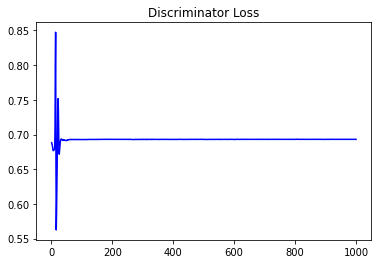

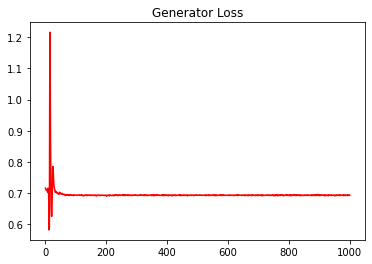

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.030273066466575453


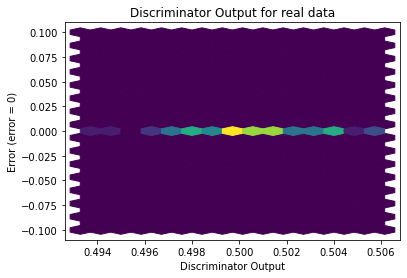

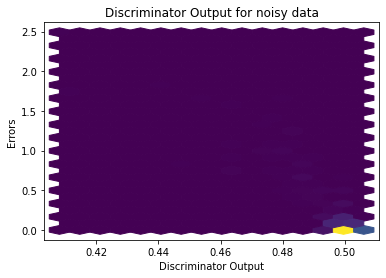

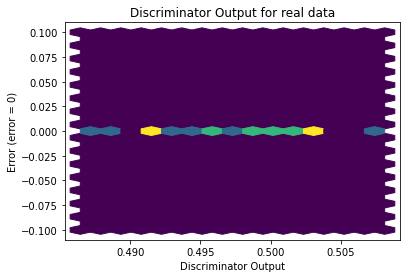

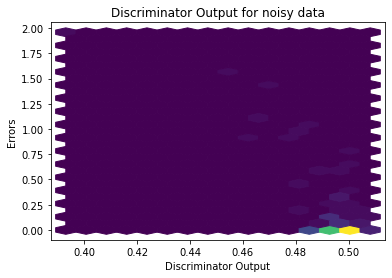

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


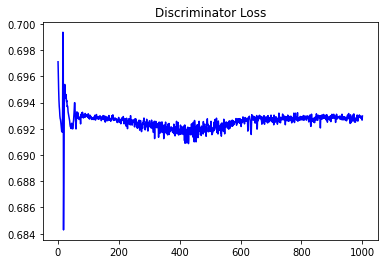

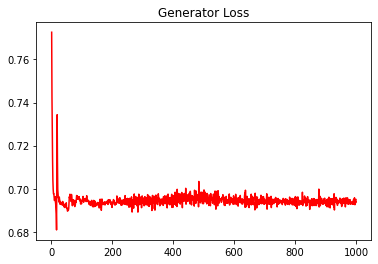

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.044697104689485415


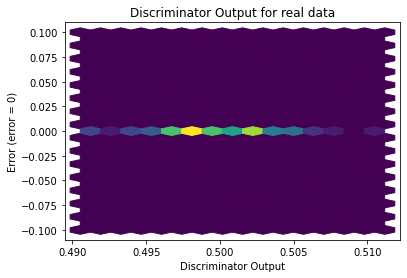

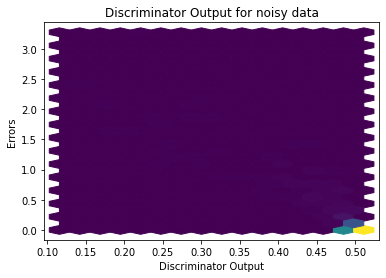

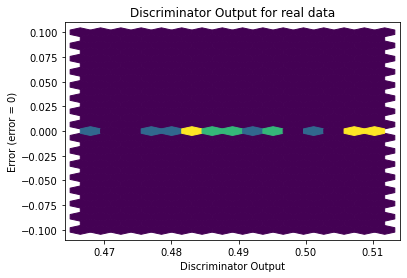

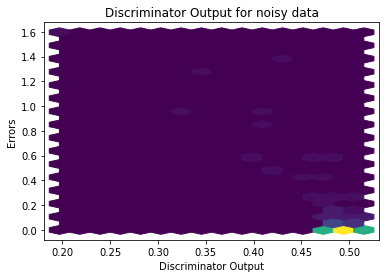

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0852]], requires_grad=True)
